# Model Evaluation and Improvement

We'll focus on evaluating models and selecting parameters for supervised methods.

In [1]:
# Thus far the way we've evaluated is to split the dataset into training/test and compute the test score,
# which is just the fraction of corrrectly classified samples.

from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data
X, y = make_blobs(random_state=0)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Train model
logreg = LogisticRegression().fit(X_train, y_train)
# Evaluate model
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


Now we'll look at other methods of evaluation, including cross-validation.

### Cross-validation (CV) 

is more stable and thorough than using a training/test set. In CV we split repeatedly 
and multiple models are trained. For instance, in five-fold cross-validation the data is partitioned into 5 parts of
equal size, called folds. Then a sequence of models is trained. The first model uses the first fold as test set and
the rest as the training set. Then we repeat this with each of the five folds. This gives five different accuracy values.

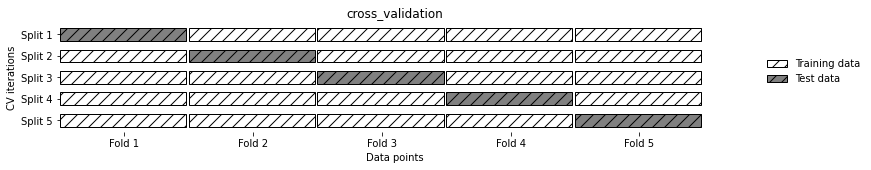

In [2]:
import mglearn

mglearn.plots.plot_cross_validation()

In [3]:
# In scikit-learn, cross-validation is implemented with cross_val_score from the model_selection module.
# The parameters are the model we want to evaluate, the training data, and the ground-truth labels.
# Here we evaluate LogisticRegression on the iris dataset.
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98 0.96 0.98]


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [4]:
# We can summarize the cross-validation scores using the mean:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


Benefits of cross-validation:

- Ensures less randomness in the splitting of the data, since each example will be in the test set exactly once.
- Provides info on how sensitive the model is to the selection of the training dataset.
- Allows us to use more of the data in training, resulting in a more accurate model.

Stratified k-Fold Cross-Validation and Other Strategies

In [5]:
# Sometimes splitting the data into k-folds by starting with the first one-k-th part is not a good idea.
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


If we split the previous data into three splits, we'd exclude entire classes each with each fold. The three-fold
cross-validation accuracy would be zero.

In stratified k-fold cross-validation, we split the data such that the proportions between classes are the same in 
each fold as they are in the whole dataset.

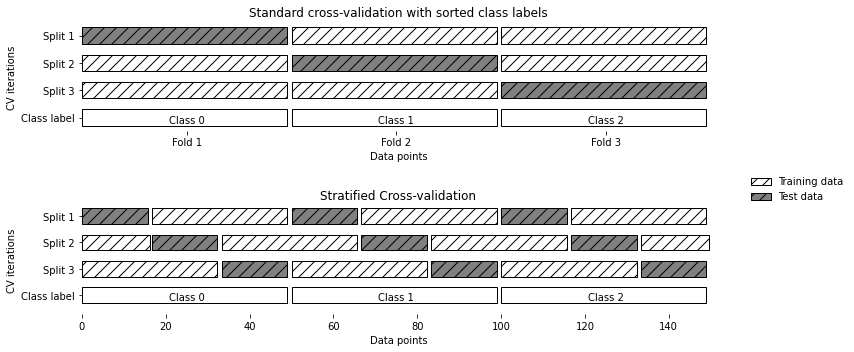

In [6]:
mglearn.plots.plot_stratified_cross_validation()

In [7]:
# scikit-learn allows for finer control over the splitting of data by providing a cross-validation splitter
# as the cv parameter.
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

In [8]:
# See what happens when we use three folds for the iris dataset:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [9]:
# One potential solution to this is to shuffle the data before using cross-validation:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

Leave-one-out cross-validation

This is essentiall k-fold cross validation where each fold is a single sample. This can be very time-consuming, but
can provide good estimates on small datasets.

In [10]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("Number of cv iterations: ", len(scores));
print("Mean accuracy: {:.2f}".format(scores.mean()));

/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

Number of cv iterations:  150
Mean accuracy: 0.97


Shuffle-split cross-validation

Shuffle-split CV uses train_size many points for the training set and test_size many points for the test set, and the splitting
is repeated n_iter times.

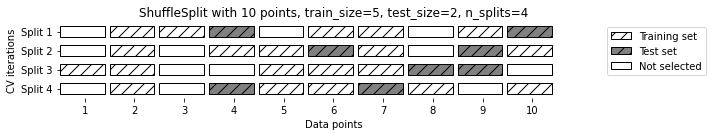

In [11]:
# For example, say our dataset is 10 points and train_size=5, test_size=2, n_iter=4
mglearn.plots.plot_shuffle_split()

In [12]:
# Now say we want 50% train, 50% test, n_iter=10

from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.94666667 0.96       0.94666667 0.93333333 0.98666667 0.97333333
 0.96       0.98666667 1.         0.94666667]


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for altern

Cross-validation with groups

If our data consists of groups which are highly related (the book uses faces showing emotions), this could be 
a good option. GroupKFold takes an array of groups as argument, which is an array indicating data that
should NOT be split when creating training/test sets.

In [13]:
# Here's an example using a synthetic dataset with a grouping. There's 12 data points and four groups.
from sklearn.model_selection import GroupKFold

# Data
X, y = make_blobs(n_samples=12, random_state=0)

# Assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


### Grid Search

Grid search is the most common method for parameter selection in ML algorithms. It essentially just means trying all possible
combinations of the parameters of interest.

In [14]:
# We can implement a simple grid search as for loops over the parameters of interest. Here we'll 
# look at a kernel SVM with two parameters: the kernel bandwidth gamma and the regularization parameter C.
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 112 size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


The Danger of Overfitting the Parameters and the Validation Set

Seeing 97% accuracy looks good, but this is overly optimistic. We found a set of parameters which gave that accuracy on the test set,
but it wont necessarily carry over to new data. 

We could split the data once again, so we have a training set, a validation set for parameter selection, and a test set for evaluation.

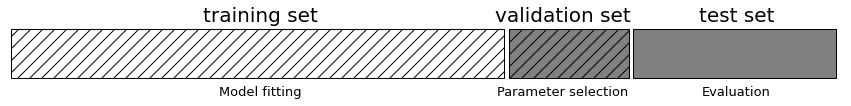

In [15]:
mglearn.plots.plot_threefold_split()

We'd select the parameters using the validation set, then rebuild the model with those parameters using both 
the training set and validation set.

In [16]:
from sklearn.svm import SVC

# Split data into training, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:" "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

# Loop in validation set to find best parameter values
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# Rebuild on the combined training and validation set using the parameters found in the loop above
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set:38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


Grid Search with Cross-Validation

The practice of splitting the dataset into train, validation, test is common, but sensitive to how the data is split.
Instead of a single split, we can use CV to evaluate the performance of each parameter combination.

In [17]:
import numpy as np

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        # Add cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # Compute mean cross-validation accuracy
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

#Rebuild the model using the parameters found above 
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

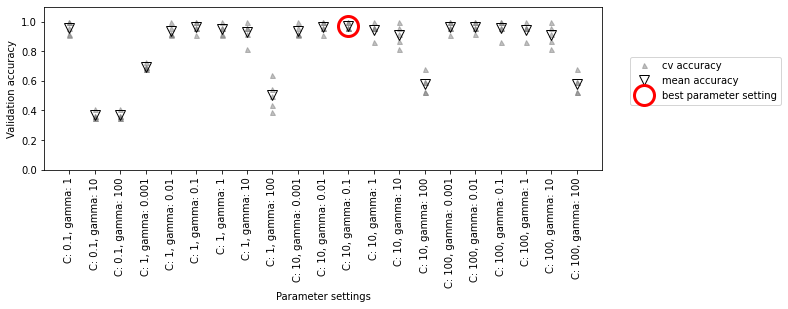

In [18]:
# Visualize how the best parameters were selected above
mglearn.plots.plot_cross_val_selection()

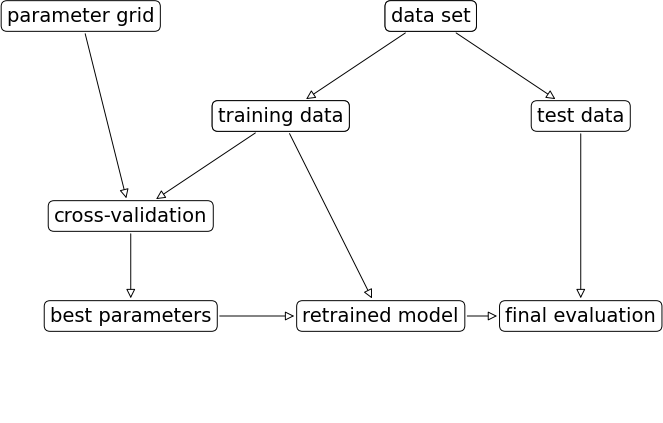

In [19]:
# This chart describes the process of splitting the data, running the grid search, and evaluating the parameters
mglearn.plots.plot_grid_search_overview()

We implemented grid search with CV manually above, but this is so common that sciki-learn provides
the GridSearchCV class, which implements this technique in the form of an estimator.

We pass the parameter names and values as a dictionary to the estimator.

In [20]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [21]:
# Now we instantiate the GridSearchCV class with the model, the parameter grid, and the CV strategy.
# Here we use model: SVC, parameter grid: param_grid, and CV strategy: five-fold stratified CV.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)


In [22]:
# The grid search will use CV in place of splitting into training/validation, but we
# still need to split the data into training/test to avoid overfitting.

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [23]:
# Now we can run fit on grid_search to run cross-validation for each combination of parameters in param_grid
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [24]:
# To evaluate we'll call score on the model with the best parameters.
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [25]:
# We can print the parameters found and mean accuracy over the splits using GridSearchCV
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


Analyzing the result of cross-validation

It's often a good idea to start with a coarse grid for grid search, look at the results, and refine as needed.

The cv_results_ attribute of a grid search stores a dictionary with all aspects of the search.

In [26]:
# The cv_results_ attribute is best looked at after converting it to a pandas DF
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000688,0.000192,0.000311,0.000116,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.000532,0.000067,0.000254,0.000086,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000697,0.000093,0.000305,0.000037,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000547,0.000044,0.000213,0.000006,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000505,0.000023,0.000210,0.000015,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


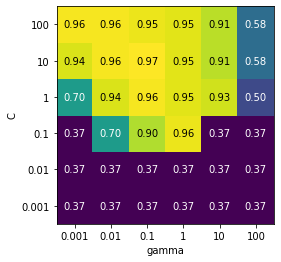

In [27]:
# We can plot a heat map showing the mean CV test score for each combinaton of C and gamma

scores = np.array(results.mean_test_score).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis");

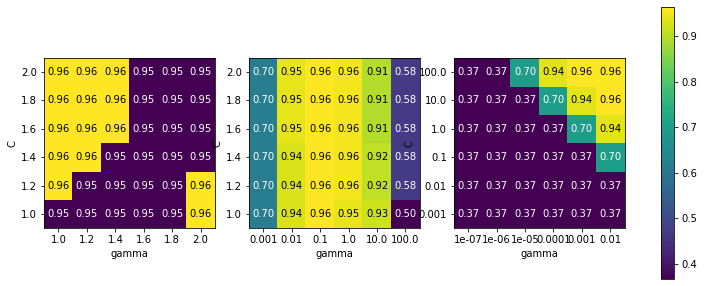

In [28]:
# The previous heat map showed we used a good range of values for C and gamma, as we have a wide range of test scores.T

# The following heat maps show what happens when we don't use a good range of values.

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist());

Search over spaces that are not grids

Sometimes trying all possible combinations of parameters is a bad idea. If we have conditional parameters, we can
pass param_grid to GridSearchCV as a list of dictionaries.

In [29]:
# A possible grid search involving kernel and parameters might look like this:
param_grid = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [30]:
# Now we can apply this more complex parameter search:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


Using different cross-validation strategies with grid search

GridSearchCV uses stratified k-fold CV by default, but we can change that if we want.

Nested cross-validation describes using multiple splits of the cross-validation instead of just a single splitting of the original data into training and test sets.

Nested CV can be helpful for determininte how well a given model works on a particular dataset.

In [31]:
# Implementing nested CV in scikit-learn is straightforward, we just pass an instance of GridSearchCV to cross_val_score
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score:  0.9666666666666668


Parallelizing cross-validation and grid search

Running grid search on large datasets with many parameters can be computationally challenging, but it is embarrasingly parallel.

GridSearchCV and cross_val_score use multiple cores by setting n_jobs to the number of CPU cores. Setting n_jobs=-1 uses all available cores.

scikit-learn does not allow nesting of parallel operations.

### Evaluation Metrics and Scoring

Thus far, we've evaluated performance using accuracy for classificaion and R^2 for regression. These might not be the right tools for the task though.

Keep the End Goal in Mind

We want to pick a metric that matches the machine learning application. This is called the business metric, or the high-level goal of the application. The consequences of choosing a particular algorithm for a machine learning application are called the business impact.

Metrics for Binary Classification

Imbalanced datasets

There are many (most?) datasets with imbalanced classes. For instance, if your data represents clicks on ads in a website you're likely to get many more "no clicks" than clicks. In this case using accuracy as a metric for the machine learning algorithm would be misleading, since just always picking "no clicks" could lead to a highly accurate model.

In [32]:
# To illustrate, we'll make a dataset with a 9:1 binary class imbalance.

from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [33]:
# We'll now import the DummyClassifier and set it to always predict the majority class.

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [34]:
# Now use an actual classifier (Decision Tree)
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

pred_tree = tree.predict(X_test)

print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


These accuracies are almost the same. Let's look at two more classifiers: Logistic Regression and a Dummy Classifier which makes random predictions but produces classes with the same proportions as the training set.

In [35]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Even the random classifier did a decent job, meaning it's hard to judge which of the results is helpful. Thus we need alternative metrics, and in particular metrics which are able to tell us how much better our models are compared to random predictions.

Confusion Matrices

These are used to represent the evaluation of binary classification. It's a two-by-two array wher ethe rows correspond to the true classes and the columns correspond to the predicted classes.

In [36]:
# Here's the confusion matrix from the Logistic Regression example
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


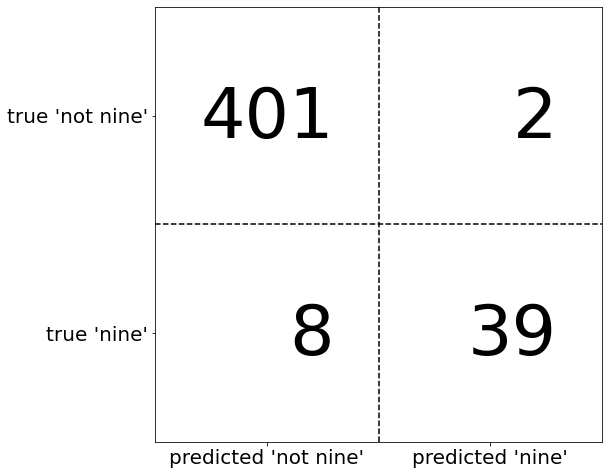

In [37]:
mglearn.plots.plot_confusion_matrix_illustration()

The diagonal entries represent correct classifications, while off-diagonal represent incorrect classifications.

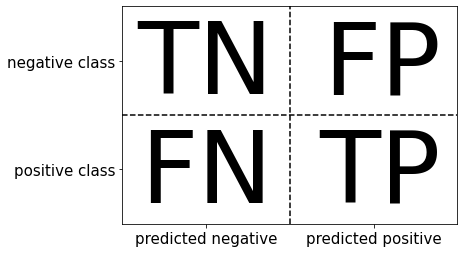

In [38]:
mglearn.plots.plot_binary_confusion_matrix()

In [39]:
# We can use confusion matrices to compare the models we fitted earlier (two dummy models, decision tree, logistic regression)
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


Relation to accuracy

We can summarize the information in the confusion matrix in several different ways. One is to compute the accuracy as

Accuracy = (TP + TN)/(TP + TN + FP + FN)

This is just the proportion of correct classifications, similar to what we saw earlier.

Precision, recall and f-score

Precision measures how many of the samples predicted as positive are actually positive:
Precision = TP/(TP + FP).
Precision is a good metric for reducing the number of false positives.

Recall measures how many of the positive samples are captured by the positive predictions:
recall = TP/(TP+FN)
Recall is a good metric for reducing the number of false negatives.

Looking at only one of precision and recall will not provide you will a full picture of performance. A way to summarize these two metrics is the f-score or f-measure, which is the harmonic mean of precision and recall:
F = 2*((precision*recall)/(precision + recall))

In [40]:
# Find the f score for the "nine vs. rest" dataset we looked at earlier, where nine is considered positive.
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))


f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [41]:
# The classification_report function will give a printout of these metrics given our predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [42]:
print(classification_report(y_test, pred_dummy, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [43]:
print(classification_report(y_test, pred_logreg, target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



Taking uncertainty into account

Predictions for classifiers throw away a lot of information when making a decision. Making predictions can be seen as thresholding the output of decision_function or predict_proba at a certain fixed point.

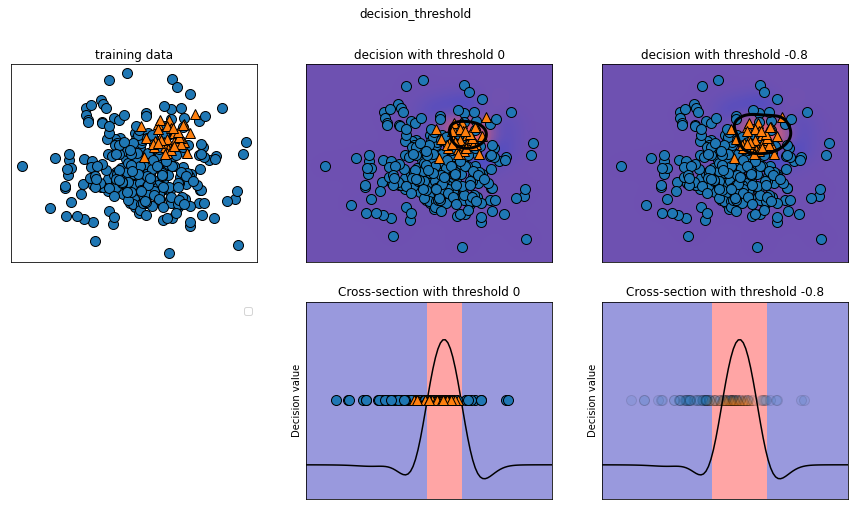

In [47]:
# Below is an example of an imbalanced dataset with SVM used to classify
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

mglearn.plots.plot_decision_threshold()

In [48]:
# Use classification_report to evaluate precision and recall
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



Suppose we want to have a higher recall for class 1, meaning we are willing to risk more false positives in exchange for more true positives. We must decrease the threshold in order to have more points classified as class 1.

In [49]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



Precision-recall curves and ROC curves

Once a goal is set for a ML algorithm (a particular recall or precision value for a class is decided upon) a threshold can be set appropriately. It's always possible to set a threshold to fulfill a particular target. The hard part, however, is developing a model that still has reasonable precision with this threshold.

Setting a requirement on a classifier is called setting the operating point. Finding the operating point is dificcult, so looking at all possible thresholds or all possible trade-offs of precision and recalls at once can be helpful. This is possible using the precision-recall curve.

In [50]:
# The sklearn.metrics module has the function which makes this curve. It needs the ground truth labeling and predicted uncertainties.
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

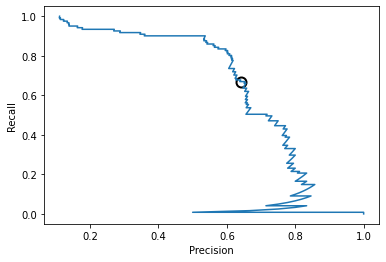

In [53]:
# This code snippet will plot the curve
# (Use more data points for a smoother curve)

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall");

The further we are in the upper right portion of the precion-recall curve the better.

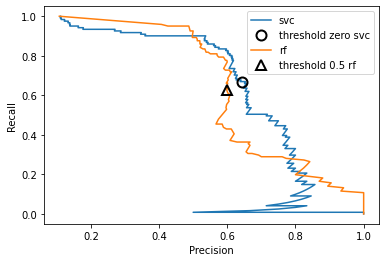

In [55]:
# We'll compare SVM with a random forest both trained on the same dataset.

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf") 

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))

plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best");

In [56]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


A potentially useful quantity is the area under the precision-recall curve, or average precision.

In [58]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


Receiver operating characteristics (ROC) and AUC

The receiver operating characterics curve (ROC curve) is another tool for analyzing the behavior of classifiers at different thresholds. It shows the false positive rate (FPR) against the true positive rate (TPR).

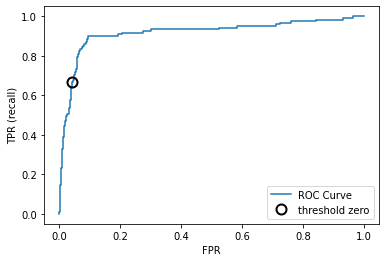

In [59]:
# The ROC curve can be computed using the roc_curve function.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);


For the ROC, the ideal curve is close to the top left, meaning the classifier produces a high recall and low false positive rate.

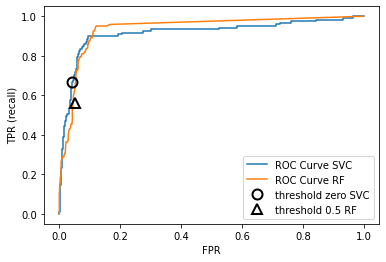

In [60]:
# Here's a comparison between the random forest and the SVM using ROC curves
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

In [61]:
# The function roc_auc_score produces the area under the ROC curve.

from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


AUC is a much better metric for imbalanced classification problems than accuracy. It's equivalent to the probability that a randomly picked point of the positive class will have a higher score according to the classifier than a randomly picked point from the negative class. A perfect AUC of 1 means that all positive points have a higher score than all negative points.

gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


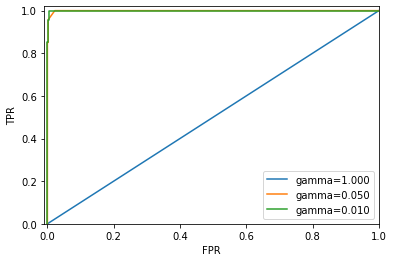

In [63]:
# Return to the problem of classifying all nines in the digits dataset vs other digits. Classify using a SVM with three different settings of the kernel bandwidth gamma.

y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
    gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best");

### Metrics for Multiclass Classification

All metrics for multiclass classification are derived from binary classification metrics, but averaged over all classes.

In [64]:
# Here's the confusion matrix and classification report applied to two detailed evaluation methods for classifying the 10 different handwritten digits in the digits dataset.

from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/home/zieglers/Documents/python/ml_python_muller_guido/.venv/lib64/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


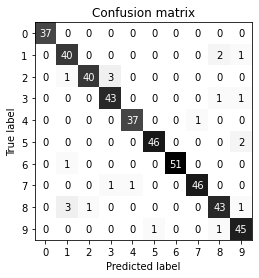

In [66]:
# Here's a more visually appealing plot of the confusion matrix:

scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label', ylabel='True label', xticklabels=digits.target_names, yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [67]:
# Once again, the classification report allows us to compute the precision, recall, and f-score for each class.

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



The multiclass f-score is the most commonly used metric for imbalanced datasets in the multiclass setting. We compute one binary f-score per class with that class being the positive class and the other classes being negative. Then we average these using either:

- macro: unweighted per-class f-scores.
- weighted: mean weighted by the support of the class.
- micro: total number of FP, FN, TP, and computes precision, recall, and f-score using these counts.

In [68]:
print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


### Regression Metrics

In general, the default R^2 score is sufficient for regression models.

### Using Evaluation Metrics in Model Selection

In [69]:
# The GridSearchCV and cross_val_score methods allow us to pass an evaluation metric to change from accuracy to something else.
# Below we look at an SVM classifier ont he nine vs. rest task using AUC and the default scoring metric.

# default scoring for classification is accuracy
print("Default scoring: {}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))

roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [70]:
# Here we change the default evaluation metric in GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [71]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000
